In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [12, 12]

In [3]:
np.random.seed(42)

We'll define some functions to simulate the Markov chain.

In [4]:
def markov_step(P, state):
    """
        Compute the next state of a Markov chain
        given the current state and the transition
        matrix P.
    """
    n = P.shape[0]
    states = list(range(n))
    probs = P[state]
    new_state = np.random.choice(states, p=probs)
    return new_state

In [5]:
def markov_steps(P, num_steps, init_state):
    """
        Compute the next num_steps states of a Markov
        chain given the initial state and the
        transition matrix P.
    """
    states = []
    state = init_state
    for _ in range(num_steps):
        states.append(state)
        state = markov_step(P, state)
    return np.array(states)

In [6]:
def proportion_of_states(P, num_steps, init_state):
    """
        Compute the proportions of times that the Markov
        chain is in each possible state, up to num_steps
        steps of the chain, given the initial state
        init_state and transition matrix P.
    """
    n = P.shape[0]
    proportions = [None for _ in range(n)]
    for i in range(n):
        states = markov_steps(P, num_steps, init_state)
        props = np.cumsum(states == i) / np.arange(1,num_steps+1)
        proportions[i] = props
    return proportions

Now we confirm that the proportions of times that the Markov chain is in each state limits to the entries of the limiting distribution.

In [10]:
P = np.array([[0.9, 0.1], [0.3, 0.7]])

In [11]:
limiting = np.array([[0.3, 0.1], [0.3, 0.1]]) / 0.4

In [12]:
print(f'Limiting distribution: \n{limiting}')

Limiting distribution: 
[[0.75 0.25]
 [0.75 0.25]]


In [13]:
proportions0 = proportion_of_states(P, 5000, 0)
proportions1 = proportion_of_states(P, 5000, 1)

Text(0.5, 1.0, '$\\hat p_n(2)$ with initial state $2$')

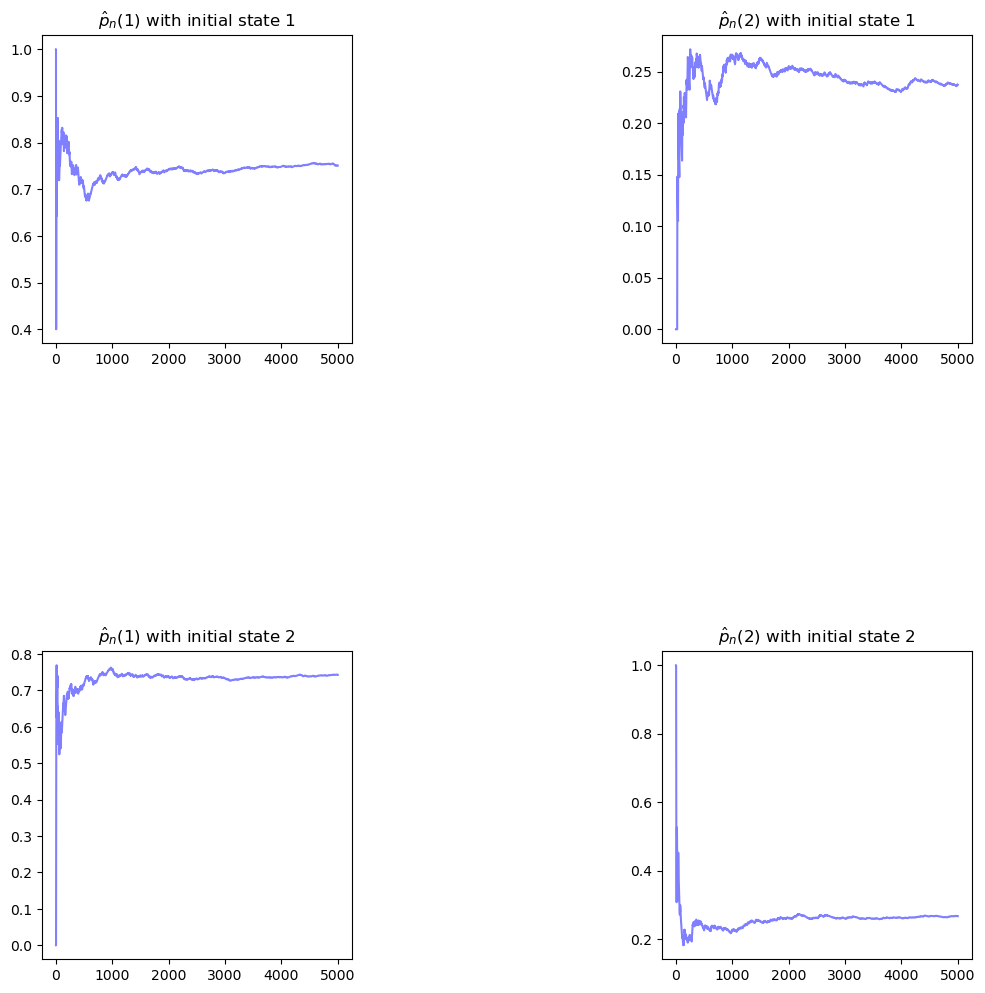

In [14]:
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(hspace=1, wspace=1)

axs[0][0].plot(proportions0[0], c='blue', alpha=0.5)
axs[0][0].set_title(r'$\hat p_n(1)$ with initial state $1$')
axs[0][1].plot(proportions0[1], c='blue', alpha=0.5)
axs[0][1].set_title(r'$\hat p_n(2)$ with initial state $1$')
axs[1][0].plot(proportions1[0], c='blue', alpha=0.5)
axs[1][0].set_title(r'$\hat p_n(1)$ with initial state $2$')
axs[1][1].plot(proportions1[1], c='blue', alpha=0.5)
axs[1][1].set_title(r'$\hat p_n(2)$ with initial state $2$')

We see that, regardless of the initial values, asymptotically the Markov chain is in state 1 about 75% of the time and in state 2 about 25% of the time.